In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

ds = load_dataset("prabinpanta0/celsius-to-fahrenheit")

c:\Users\Lenovo\CelsiusToFahrenheitTf\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = ds["train"].to_pandas() 

In [3]:
print(df.describe())

           celsius   fahrenheit
count  1000.000000  1000.000000
mean    -88.461350  -127.230430
std     111.151153   200.072075
min    -273.110000  -459.598000
25%    -188.685000  -307.633000
50%     -89.530000  -129.154000
75%      10.632500    51.138500
max      99.570000   211.226000


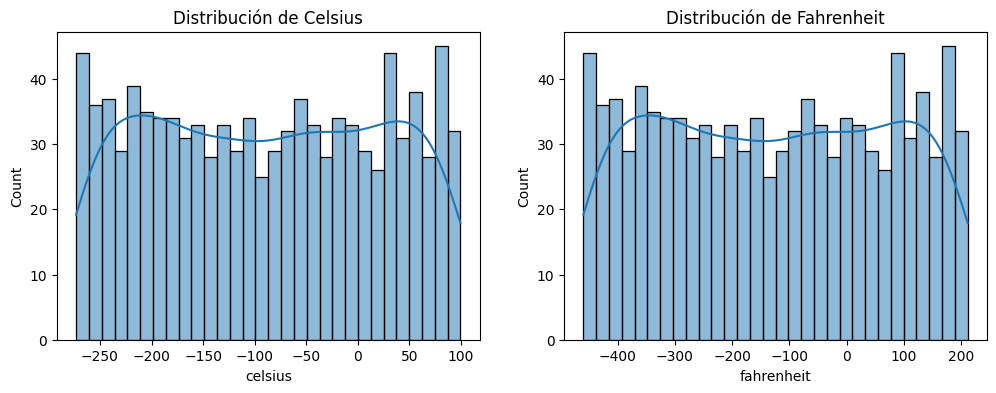

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df["celsius"], bins=30, ax=ax1, kde=True)
sns.histplot(df["fahrenheit"], bins=30, ax=ax2, kde=True)
ax1.set_title("Distribución de Celsius")
ax2.set_title("Distribución de Fahrenheit")
plt.show()

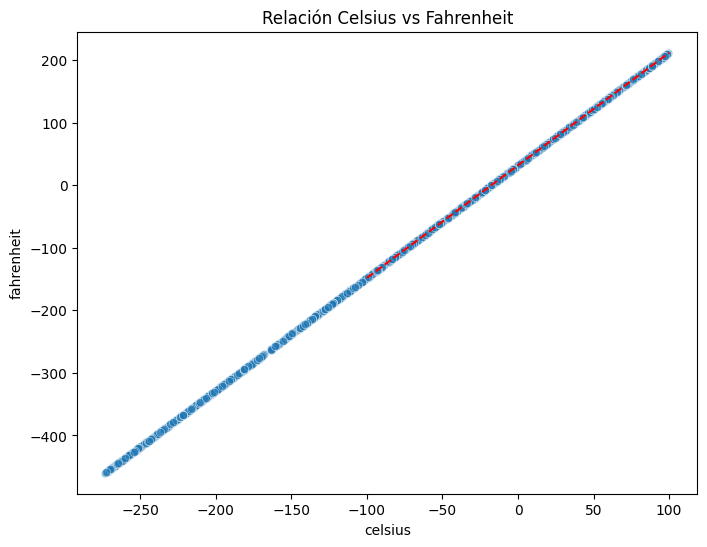

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="celsius", y="fahrenheit", data=df, alpha=0.6)
plt.title("Relación Celsius vs Fahrenheit")
plt.plot([-100, 100], [-148, 212], 'r--')  # Línea de fórmula teórica
plt.show()

In [19]:
# Verificar que se cumple la fórmula física
dfVerify = df.copy()
dfVerify["fahrenheit_calculado"] = dfVerify["celsius"] * 9/5 + 32
dfVerify["diferencia"] = abs(dfVerify["fahrenheit"] - dfVerify["fahrenheit_calculado"])

# Identificar outliers (errores > 1°F)
outliers = dfVerify[dfVerify["diferencia"] > 1]
print(f"Outliers detectados: {len(outliers)}")
dfVerify

Outliers detectados: 0


,celsius,fahrenheit,fahrenheit_calculado,diferencia
0,-193.56,-316.408,-316.408,0.000000e+00
1,-224.00,-371.200,-371.200,0.000000e+00
2,-132.74,-206.932,-206.932,2.842171e-14
3,46.62,115.916,115.916,0.000000e+00
4,-189.35,-308.830,-308.830,0.000000e+00
...,...,...,...,...
995,52.03,125.654,125.654,0.000000e+00
996,-196.11,-320.998,-320.998,5.684342e-14
997,-41.58,-42.844,-42.844,7.105427e-15
998,88.40,191.120,191.120,0.000000e+00


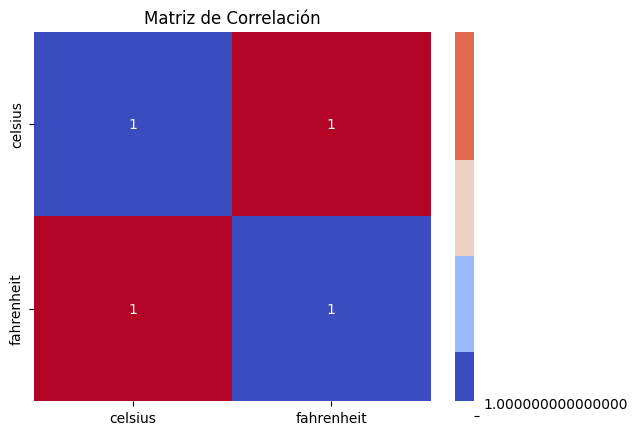

In [20]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [7]:
# Dividir datos (si no hay split predefinido)
from sklearn.model_selection import train_test_split

X = df[["celsius"]]
y = df["fahrenheit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Train: {len(X_train)} samples | Test: {len(X_test)} samples")

# Exportar a CSV para uso en scripts
X_train.to_csv("./X_train.csv", index=False)
y_train.to_csv("./y_train.csv", index=False)
X_test.to_csv("./X_test.csv", index=False)
y_test.to_csv("./y_test.csv", index=False)


Train: 900 samples | Test: 100 samples
